## Notebook Parameters

Configure the analysis settings below.

In [19]:
# Datasets to analyze
DATASETS = {
    'GPT-4': "../markedpersonas/data/gpt4_main_generations.csv",
    'ChatGPT': "../markedpersonas/data/chatgpt/chatgpt_main_generations.csv",
    'DaVinci-002': "../markedpersonas/data/dv2/dv2_main_generations.csv",
    'DaVinci-003': "../markedpersonas/data/dv3/dv3_main_generations.csv",
}

## Setup

Import required libraries and configure the environment.

In [20]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from cs7313.embeddings.preprocessing import DefaultPreprocessing

## Load All Datasets

In [21]:
# Load all datasets
dataframes = {}
preprocessor = DefaultPreprocessing()
for name, path in DATASETS.items():
    try:
        df = pd.read_csv(path)
        df["dataset"] = name
        df['text'] = df['text'].apply(lambda x: preprocessor.preprocess(str(x)))
        dataframes[name] = df
        print(f"Loaded {name}: {len(df)} samples")
        print(f"Columns: {list(df.columns)}")
    except Exception as e:
        print(f"Failed to load {name}: {e}")

print(f"\nTotal datasets loaded: {len(dataframes)}")

Loaded GPT-4: 1350 samples
Columns: ['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'text', 'prompt_num', 'model', 'gender', 'race', 'prompt', 'dataset']
Loaded ChatGPT: 1650 samples
Columns: ['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'text', 'prompt_num', 'model', 'gender', 'race', 'prompt', 'dataset']
Loaded DaVinci-002: 900 samples
Columns: ['Unnamed: 0', 'text', 'model', 'gender', 'race', 'prompt', 'dataset']
Loaded DaVinci-003: 1350 samples
Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'text', 'model', 'gender', 'race', 'prompt', 'prompt_num', 'dataset']

Total datasets loaded: 4


# NLP Exploratory Data Analysis - MarkedPersonas Datasets

## 1. Dataset Overview

In [22]:
# Display sample from each dataset
for name, df in dataframes.items():
    print(f"\n{'='*60}")
    print(f"Dataset: {name}")
    print(f"{'='*60}")
    print(f"Shape: {df.shape}")
    print(f"\nFirst sample text:")
    print(df['text'].iloc[0][:300] + "..." if len(str(df['text'].iloc[0])) > 300 else df['text'].iloc[0])
    
    # Show demographic distribution if available
    if 'gender' in df.columns and 'race' in df.columns:
        print(f"\nDemographic breakdown:")
        print(f"Gender: {df['gender'].value_counts().to_dict()}")
        print(f"Race: {df['race'].value_counts().to_dict()}")


Dataset: GPT-4
Shape: (1350, 11)

First sample text:
a white man is an individual belonging to the caucasian race, characterized by lighter skin tones that can range from pale to beige, light brown, or olive. his hair color can vary from blonde, brown, black, or red, and his eye color can be blue, green, gray, or brown. white men typically have europe...

Demographic breakdown:
Gender: {'M': 450, 'W': 450, 'N': 450}
Race: {'a White': 270, 'a Black': 270, 'an Asian': 270, 'a Middle-Eastern': 270, 'a Latine': 270}

Dataset: ChatGPT
Shape: (1650, 11)

First sample text:
well, i'm a pretty average white guy, i suppose. i grew up in a small town, played sports in high school, went to college and got a degree in business. i work in finance now and enjoy it for the most part. in my free time, i like to hunt, fish, and watch sports. i root for the local football team an...

Demographic breakdown:
Gender: {'M': 750, 'W': 750, 'N': 150}
Race: {'a White': 330, 'a Black': 330, 'an Asian': 330, 'a

In [23]:
df = pd.concat(dataframes.values(), ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.3  3000 non-null   float64
 1   Unnamed: 0.2  2400 non-null   float64
 2   Unnamed: 0.1  3750 non-null   float64
 3   Unnamed: 0    5250 non-null   int64  
 4   text          5250 non-null   object 
 5   prompt_num    3450 non-null   float64
 6   model         5250 non-null   object 
 7   gender        5250 non-null   object 
 8   race          5250 non-null   object 
 9   prompt        5250 non-null   object 
 10  dataset       5250 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 451.3+ KB


In [24]:
# Missing values analysis
print("="*80)
print("COMBINED DATASETS - MISSING VALUES")
print("="*80)

print("\nMissing values per column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Per-dataset missing values
print("\n" + "="*80)
print("PER-DATASET MISSING VALUES")
print("="*80)

for dataset_name in dataframes.keys():
    dataset_df = df[df['dataset'] == dataset_name]
    print(f"\n{'-'*80}")
    print(f"Dataset: {dataset_name}")
    print(f"{'-'*80}")
    
    missing = dataset_df.isnull().sum()
    print("\nMissing values per column:")
    print(missing[missing > 0] if missing.sum() > 0 else "No missing values")
    print(f"\nTotal missing values: {missing.sum()}")
    print(f"Percentage: {(missing.sum() / (dataset_df.shape[0] * dataset_df.shape[1]) * 100):.2f}%")

COMBINED DATASETS - MISSING VALUES

Missing values per column:
Unnamed: 0.3    2250
Unnamed: 0.2    2850
Unnamed: 0.1    1500
Unnamed: 0         0
text               0
prompt_num      1800
model              0
gender             0
race               0
prompt             0
dataset            0
dtype: int64

Total missing values: 8400
Percentage of missing data: 14.55%

PER-DATASET MISSING VALUES

--------------------------------------------------------------------------------
Dataset: GPT-4
--------------------------------------------------------------------------------

Missing values per column:
Unnamed: 0.2    450
Unnamed: 0.1    450
dtype: int64

Total missing values: 900
Percentage: 6.06%

--------------------------------------------------------------------------------
Dataset: ChatGPT
--------------------------------------------------------------------------------

Missing values per column:
Unnamed: 0.2    150
Unnamed: 0.1    150
dtype: int64

Total missing values: 300
Percentage

In [25]:
# Cross-tabulation of dataset vs demographics
print("Dataset vs Gender:")
cross_gender = pd.crosstab(df['dataset'], df['gender'], margins=True)
print(cross_gender)
print(f"\n{'='*50}\n")

print("Dataset vs Race:")
cross_race = pd.crosstab(df['dataset'], df['race'], margins=True)
print(cross_race)

Dataset vs Gender:
gender          M     N     W   All
dataset                            
ChatGPT       750   150   750  1650
DaVinci-002   450     0   450   900
DaVinci-003   450   450   450  1350
GPT-4         450   450   450  1350
All          2100  1050  2100  5250


Dataset vs Race:
race         a Black  a Latine  a Middle-Eastern  a White  an Asian   All
dataset                                                                  
ChatGPT          330       330               330      330       330  1650
DaVinci-002      180       180               180      180       180   900
DaVinci-003      270       270               270      270       270  1350
GPT-4            270       270               270      270       270  1350
All             1050      1050              1050     1050      1050  5250


## 2. Text Analysis - Basic Statistics

In [26]:
# Text length statistics
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()
df['sentence_count'] = df['text'].str.count(r'[.!?]+')

print("="*80)
print("COMBINED DATASETS - TEXT STATISTICS")
print("="*80)

print("\nText Length Statistics:")
print(df['text_length'].describe())

print("\nWord Count Statistics:")
print(df['word_count'].describe())

print("\nSentence Count Statistics:")
print(df['sentence_count'].describe())

# Per-dataset statistics
print("\n" + "="*80)
print("PER-DATASET TEXT STATISTICS")
print("="*80)

for dataset_name in dataframes.keys():
    dataset_df = df[df['dataset'] == dataset_name]
    print(f"\n{'-'*80}")
    print(f"Dataset: {dataset_name}")
    print(f"{'-'*80}")
    
    print("\nText Length Statistics:")
    print(dataset_df['text_length'].describe())
    
    print("\nWord Count Statistics:")
    print(dataset_df['word_count'].describe())
    
    print("\nSentence Count Statistics:")
    print(dataset_df['sentence_count'].describe())

COMBINED DATASETS - TEXT STATISTICS

Text Length Statistics:
count    5250.000000
mean      566.808000
std       258.750334
min        28.000000
25%       389.000000
50%       581.000000
75%       718.000000
max      2519.000000
Name: text_length, dtype: float64

Word Count Statistics:
count    5250.000000
mean       98.656762
std        44.223125
min         5.000000
25%        69.000000
50%        99.000000
75%       123.000000
max       389.000000
Name: word_count, dtype: float64

Sentence Count Statistics:
count    5250.000000
mean        5.779619
std         2.180379
min         1.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        21.000000
Name: sentence_count, dtype: float64

PER-DATASET TEXT STATISTICS

--------------------------------------------------------------------------------
Dataset: GPT-4
--------------------------------------------------------------------------------

Text Length Statistics:
count    1350.000000
mean      726.652593
std  

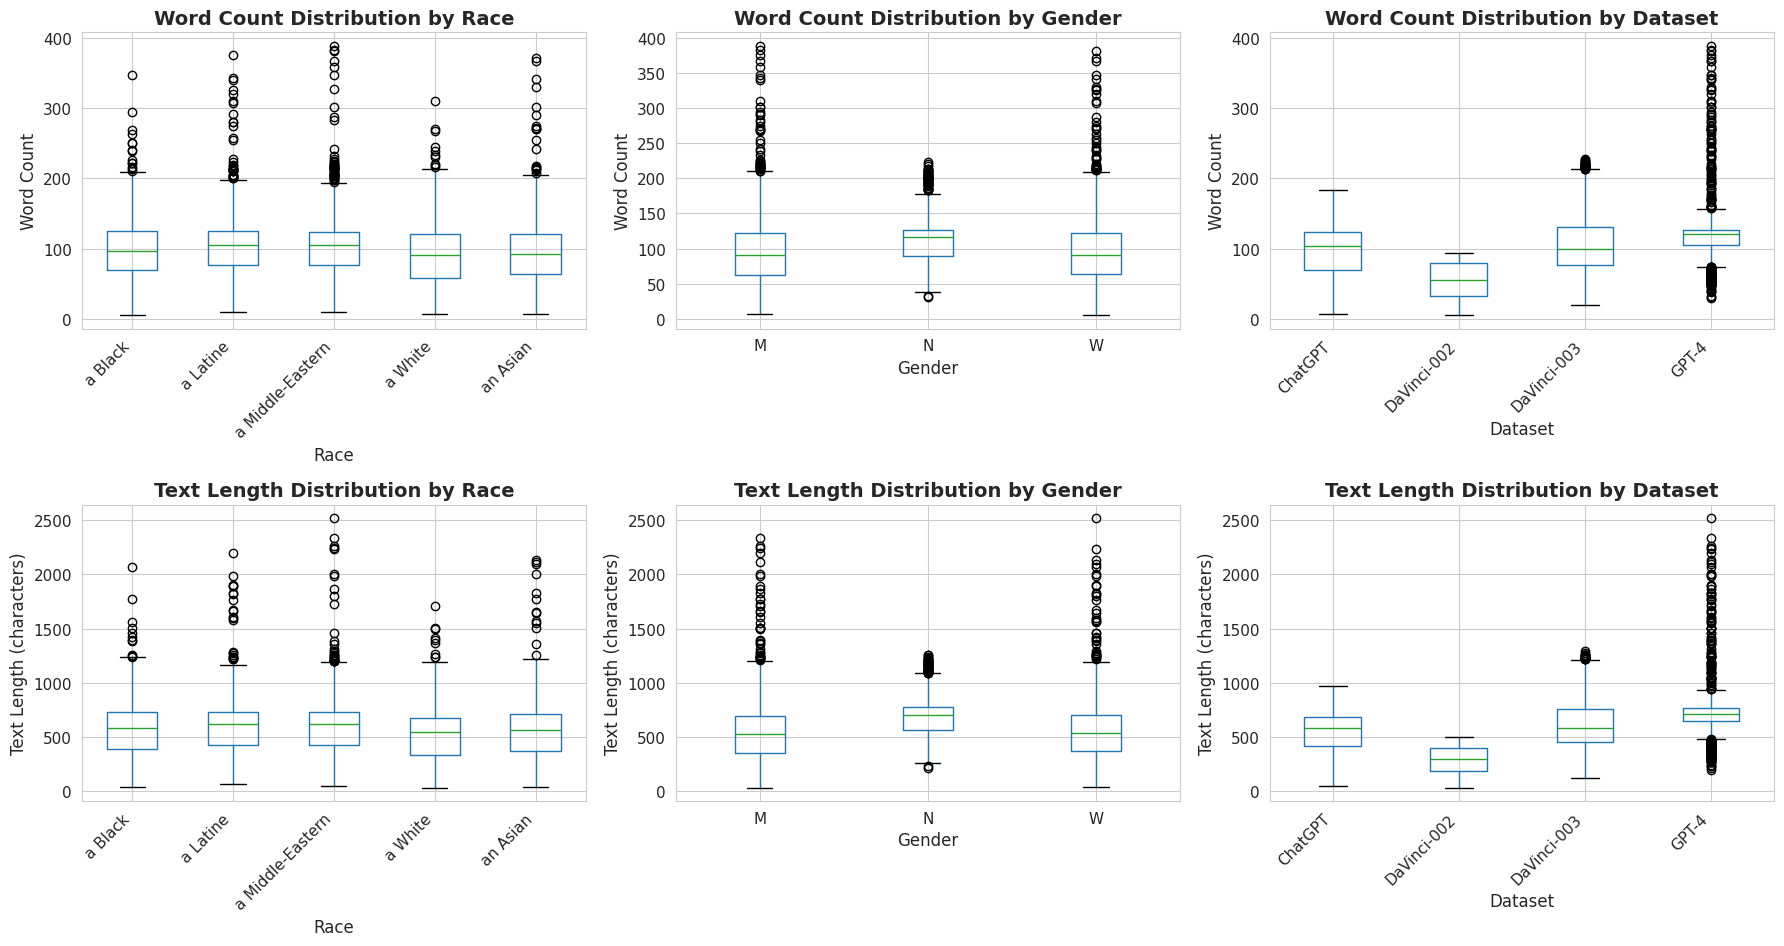

In [27]:
# Text statistics by demographic groups
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create output directory if it doesn't exist
os.makedirs('../docs/assets', exist_ok=True)

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Word count by race
df.boxplot(column='word_count', by='race', ax=axes[0, 0])
axes[0, 0].set_title('Word Count Distribution by Race', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Race', fontsize=12)
axes[0, 0].set_ylabel('Word Count', fontsize=12)
plt.sca(axes[0, 0])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Word count by gender
df.boxplot(column='word_count', by='gender', ax=axes[0, 1])
axes[0, 1].set_title('Word Count Distribution by Gender', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gender', fontsize=12)
axes[0, 1].set_ylabel('Word Count', fontsize=12)
axes[0, 1].tick_params(axis='both', labelsize=11)

# Word count by dataset
df.boxplot(column='word_count', by='dataset', ax=axes[0, 2])
axes[0, 2].set_title('Word Count Distribution by Dataset', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Dataset', fontsize=12)
axes[0, 2].set_ylabel('Word Count', fontsize=12)
plt.sca(axes[0, 2])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Text length by race
df.boxplot(column='text_length', by='race', ax=axes[1, 0])
axes[1, 0].set_title('Text Length Distribution by Race', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Race', fontsize=12)
axes[1, 0].set_ylabel('Text Length (characters)', fontsize=12)
plt.sca(axes[1, 0])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Text length by gender
df.boxplot(column='text_length', by='gender', ax=axes[1, 1])
axes[1, 1].set_title('Text Length Distribution by Gender', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Gender', fontsize=12)
axes[1, 1].set_ylabel('Text Length (characters)', fontsize=12)
axes[1, 1].tick_params(axis='both', labelsize=11)

# Text length by dataset
df.boxplot(column='text_length', by='dataset', ax=axes[1, 2])
axes[1, 2].set_title('Text Length Distribution by Dataset', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Dataset', fontsize=12)
axes[1, 2].set_ylabel('Text Length (characters)', fontsize=12)
plt.sca(axes[1, 2])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.suptitle('')
plt.savefig('../docs/assets/eda_demographics.png', dpi=600, bbox_inches='tight')
plt.show()


## 3. Lexical Diversity and Complexity

In [28]:
# Calculate lexical diversity (Type-Token Ratio)
def calculate_ttr(text):
    words = str(text).lower().split()
    if len(words) == 0:
        return 0
    unique_words = len(set(words))
    return unique_words / len(words)

df['ttr'] = df['text'].apply(calculate_ttr)
df['avg_word_length'] = df['text'].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()) if len(str(x).split()) > 0 else 0)

print("="*80)
print("COMBINED DATASETS - LEXICAL DIVERSITY")
print("="*80)

print("\nLexical Diversity (TTR) Statistics:")
print(df['ttr'].describe())
print(f"\n{'='*50}\n")

print("Average Word Length Statistics:")
print(df['avg_word_length'].describe())

# Per-dataset statistics
print("\n" + "="*80)
print("PER-DATASET LEXICAL DIVERSITY")
print("="*80)

for dataset_name in dataframes.keys():
    dataset_df = df[df['dataset'] == dataset_name]
    print(f"\n{'-'*80}")
    print(f"Dataset: {dataset_name}")
    print(f"{'-'*80}")
    
    print("\nLexical Diversity (TTR) Statistics:")
    print(dataset_df['ttr'].describe())
    
    print("\nAverage Word Length Statistics:")
    print(dataset_df['avg_word_length'].describe())

COMBINED DATASETS - LEXICAL DIVERSITY

Lexical Diversity (TTR) Statistics:
count    5250.000000
mean        0.713392
std         0.073887
min         0.383333
25%         0.671642
50%         0.711597
75%         0.750000
max         1.000000
Name: ttr, dtype: float64


Average Word Length Statistics:
count    5250.000000
mean        4.733375
std         0.464604
min         3.100000
25%         4.444647
50%         4.733046
75%         5.018824
max         6.583333
Name: avg_word_length, dtype: float64

PER-DATASET LEXICAL DIVERSITY

--------------------------------------------------------------------------------
Dataset: GPT-4
--------------------------------------------------------------------------------

Lexical Diversity (TTR) Statistics:
count    1350.000000
mean        0.735880
std         0.054307
min         0.573298
25%         0.702479
50%         0.733333
75%         0.767241
max         1.000000
Name: ttr, dtype: float64

Average Word Length Statistics:
count    1350.0000

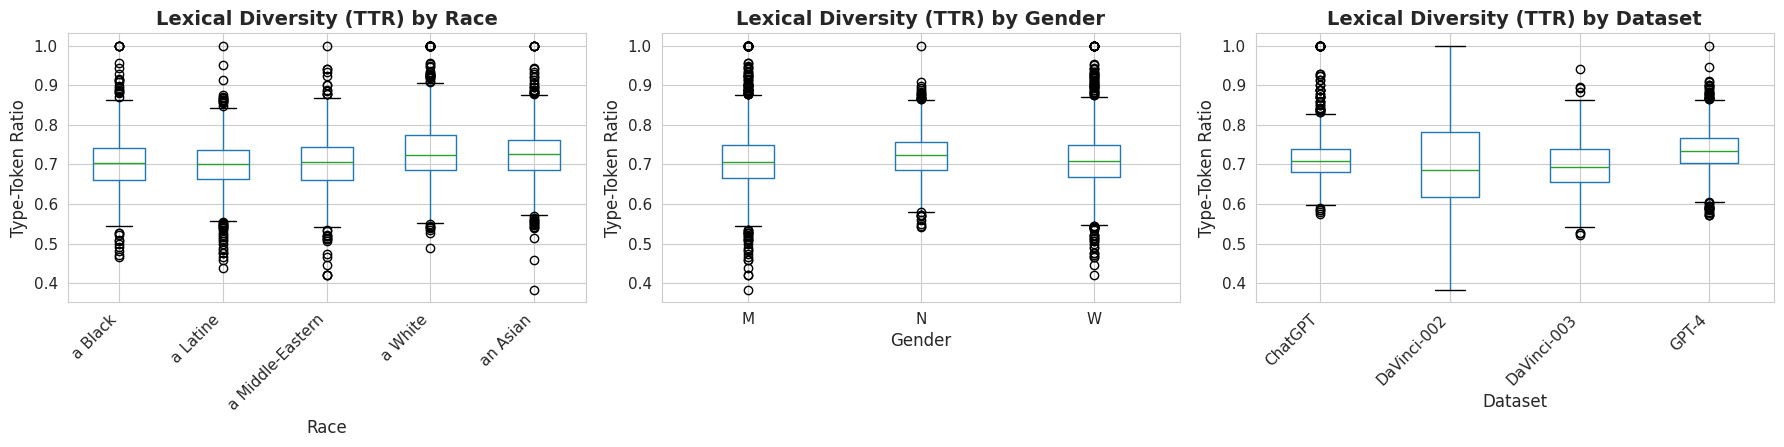

In [29]:
# Lexical diversity comparison by demographics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TTR by race
df.boxplot(column='ttr', by='race', ax=axes[0])
axes[0].set_title('Lexical Diversity (TTR) by Race', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Race', fontsize=12)
axes[0].set_ylabel('Type-Token Ratio', fontsize=12)
plt.sca(axes[0])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# TTR by gender
df.boxplot(column='ttr', by='gender', ax=axes[1])
axes[1].set_title('Lexical Diversity (TTR) by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Type-Token Ratio', fontsize=12)
axes[1].tick_params(axis='both', labelsize=11)

# TTR by dataset
df.boxplot(column='ttr', by='dataset', ax=axes[2])
axes[2].set_title('Lexical Diversity (TTR) by Dataset', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Dataset', fontsize=12)
axes[2].set_ylabel('Type-Token Ratio', fontsize=12)
plt.sca(axes[2])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.suptitle('')
plt.savefig('../docs/assets/eda_ttr.png', dpi=600, bbox_inches='tight')
plt.show()


## 4. Sentiment Analysis

Analyzing the sentiment polarity and subjectivity of generated text across demographics.

In [30]:
from textblob import TextBlob

In [31]:
# Calculate sentiment scores
def get_sentiment(text):
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    except:
        return 0, 0

df['polarity'], df['subjectivity'] = zip(*df['text'].apply(get_sentiment))

print("="*80)
print("COMBINED DATASETS - SENTIMENT ANALYSIS")
print("="*80)

print("\nSentiment Polarity Statistics:")
print(df['polarity'].describe())
print(f"\n{'='*50}\n")

print("Sentiment Subjectivity Statistics:")
print(df['subjectivity'].describe())

# Per-dataset statistics
print("\n" + "="*80)
print("PER-DATASET SENTIMENT ANALYSIS")
print("="*80)

for dataset_name in dataframes.keys():
    dataset_df = df[df['dataset'] == dataset_name]
    print(f"\n{'-'*80}")
    print(f"Dataset: {dataset_name}")
    print(f"{'-'*80}")
    
    print("\nSentiment Polarity Statistics:")
    print(dataset_df['polarity'].describe())
    
    print("\nSentiment Subjectivity Statistics:")
    print(dataset_df['subjectivity'].describe())

COMBINED DATASETS - SENTIMENT ANALYSIS

Sentiment Polarity Statistics:
count    5250.000000
mean        0.167354
std         0.123220
min        -0.305556
25%         0.088987
50%         0.166667
75%         0.244058
max         0.700000
Name: polarity, dtype: float64


Sentiment Subjectivity Statistics:
count    5250.000000
mean        0.497818
std         0.118622
min         0.000000
25%         0.425751
50%         0.498666
75%         0.569116
max         1.000000
Name: subjectivity, dtype: float64

PER-DATASET SENTIMENT ANALYSIS

--------------------------------------------------------------------------------
Dataset: GPT-4
--------------------------------------------------------------------------------

Sentiment Polarity Statistics:
count    1350.000000
mean        0.142750
std         0.091124
min        -0.112889
25%         0.077778
50%         0.141334
75%         0.200991
max         0.630000
Name: polarity, dtype: float64

Sentiment Subjectivity Statistics:
count    1350

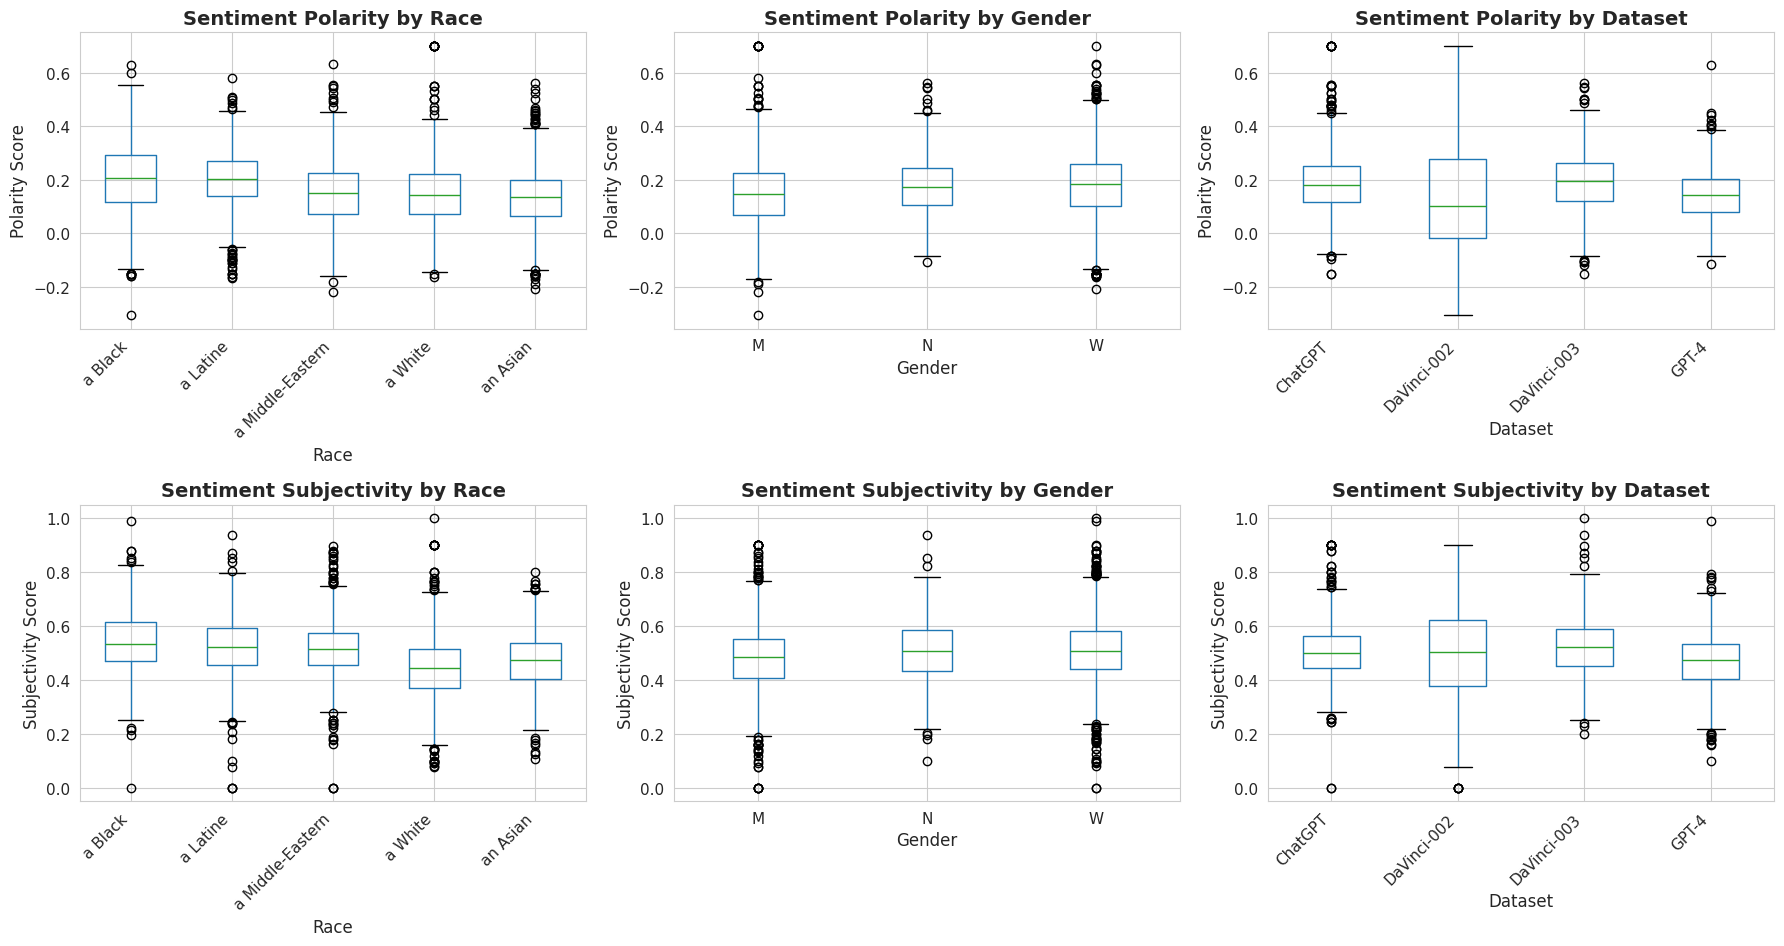

Saved: docs/assets/sentiment_analysis_demographics.png


In [32]:
# Sentiment comparison by demographics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Polarity by race
df.boxplot(column='polarity', by='race', ax=axes[0, 0])
axes[0, 0].set_title('Sentiment Polarity by Race', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Race', fontsize=12)
axes[0, 0].set_ylabel('Polarity Score', fontsize=12)
plt.sca(axes[0, 0])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Polarity by gender
df.boxplot(column='polarity', by='gender', ax=axes[0, 1])
axes[0, 1].set_title('Sentiment Polarity by Gender', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Gender', fontsize=12)
axes[0, 1].set_ylabel('Polarity Score', fontsize=12)
axes[0, 1].tick_params(axis='both', labelsize=11)

# Polarity by dataset
df.boxplot(column='polarity', by='dataset', ax=axes[0, 2])
axes[0, 2].set_title('Sentiment Polarity by Dataset', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Dataset', fontsize=12)
axes[0, 2].set_ylabel('Polarity Score', fontsize=12)
plt.sca(axes[0, 2])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Subjectivity by race
df.boxplot(column='subjectivity', by='race', ax=axes[1, 0])
axes[1, 0].set_title('Sentiment Subjectivity by Race', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Race', fontsize=12)
axes[1, 0].set_ylabel('Subjectivity Score', fontsize=12)
plt.sca(axes[1, 0])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Subjectivity by gender
df.boxplot(column='subjectivity', by='gender', ax=axes[1, 1])
axes[1, 1].set_title('Sentiment Subjectivity by Gender', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Gender', fontsize=12)
axes[1, 1].set_ylabel('Subjectivity Score', fontsize=12)
axes[1, 1].tick_params(axis='both', labelsize=11)

# Subjectivity by dataset
df.boxplot(column='subjectivity', by='dataset', ax=axes[1, 2])
axes[1, 2].set_title('Sentiment Subjectivity by Dataset', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Dataset', fontsize=12)
axes[1, 2].set_ylabel('Subjectivity Score', fontsize=12)
plt.sca(axes[1, 2])
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.suptitle('')
plt.savefig('../docs/assets/sentiment_analysis_demographics.png', dpi=600, bbox_inches='tight')
plt.show()
print("Saved: docs/assets/sentiment_analysis_demographics.png")


In [33]:
print("="*80)
print("COMPREHENSIVE EDA SUMMARY")
print("="*80)

print(f"\nTotal Datasets Analyzed: {len(dataframes)}")
for name, df_temp in dataframes.items():
    print(f"  - {name}: {len(df_temp)} samples")

print(f"\nTotal Samples: {len(df)}")
print(f"Unique Genders: {df['gender'].nunique()} - {list(df['gender'].unique())}")
print(f"Unique Races: {df['race'].nunique()} - {list(df['race'].unique())}")
print(f"Unique Models: {df['model'].nunique()} - {list(df['model'].unique())}")

print("\nOverall Statistics:")
print(f"  Average Word Count: {df['word_count'].mean():.2f} (±{df['word_count'].std():.2f})")
print(f"  Average Text Length: {df['text_length'].mean():.2f} (±{df['text_length'].std():.2f})")
print(f"  Average TTR: {df['ttr'].mean():.3f} (±{df['ttr'].std():.3f})")
print(f"  Average Polarity: {df['polarity'].mean():.3f} (±{df['polarity'].std():.3f})")
print(f"  Average Subjectivity: {df['subjectivity'].mean():.3f} (±{df['subjectivity'].std():.3f})")

print("\n" + "="*80)

COMPREHENSIVE EDA SUMMARY

Total Datasets Analyzed: 4
  - GPT-4: 1350 samples
  - ChatGPT: 1650 samples
  - DaVinci-002: 900 samples
  - DaVinci-003: 1350 samples

Total Samples: 5250
Unique Genders: 3 - ['M', 'W', 'N']
Unique Races: 5 - ['a White', 'a Black', 'an Asian', 'a Middle-Eastern', 'a Latine']
Unique Models: 4 - ['gpt4', 'chatgpt', 'openai/text-davinci-002', 'text-davinci-003']

Overall Statistics:
  Average Word Count: 98.66 (±44.22)
  Average Text Length: 566.81 (±258.75)
  Average TTR: 0.713 (±0.074)
  Average Polarity: 0.167 (±0.123)
  Average Subjectivity: 0.498 (±0.119)



## 6. Summary Statistics and Insights

In [34]:
# Analyze text characteristics by dataset and demographics
for dataset_name in dataframes.keys():
    print(f"\n{'='*80}")
    print(f"Dataset: {dataset_name}")
    print(f"{'='*80}")
    
    dataset_df = df[df['dataset'] == dataset_name]
    
    print(f"\nTotal samples: {len(dataset_df)}")
    print(f"\nWord count statistics:")
    print(dataset_df.groupby(['gender', 'race'])['word_count'].mean().round(2))
    
    print(f"\nPolarity statistics:")
    print(dataset_df.groupby(['gender', 'race'])['polarity'].mean().round(3))


Dataset: GPT-4

Total samples: 1350

Word count statistics:
gender  race            
M       a Black             120.48
        a Latine            132.12
        a Middle-Eastern    130.77
        a White             116.97
        an Asian            122.28
N       a Black             111.90
        a Latine            112.26
        a Middle-Eastern    116.68
        a White             105.32
        an Asian            111.92
W       a Black             123.04
        a Latine            136.99
        a Middle-Eastern    133.64
        a White             112.83
        an Asian            122.70
Name: word_count, dtype: float64

Polarity statistics:
gender  race            
M       a Black             0.152
        a Latine            0.162
        a Middle-Eastern    0.098
        a White             0.091
        an Asian            0.120
N       a Black             0.151
        a Latine            0.172
        a Middle-Eastern    0.155
        a White             0.118
   

### Dataset-Specific Demographic Patterns

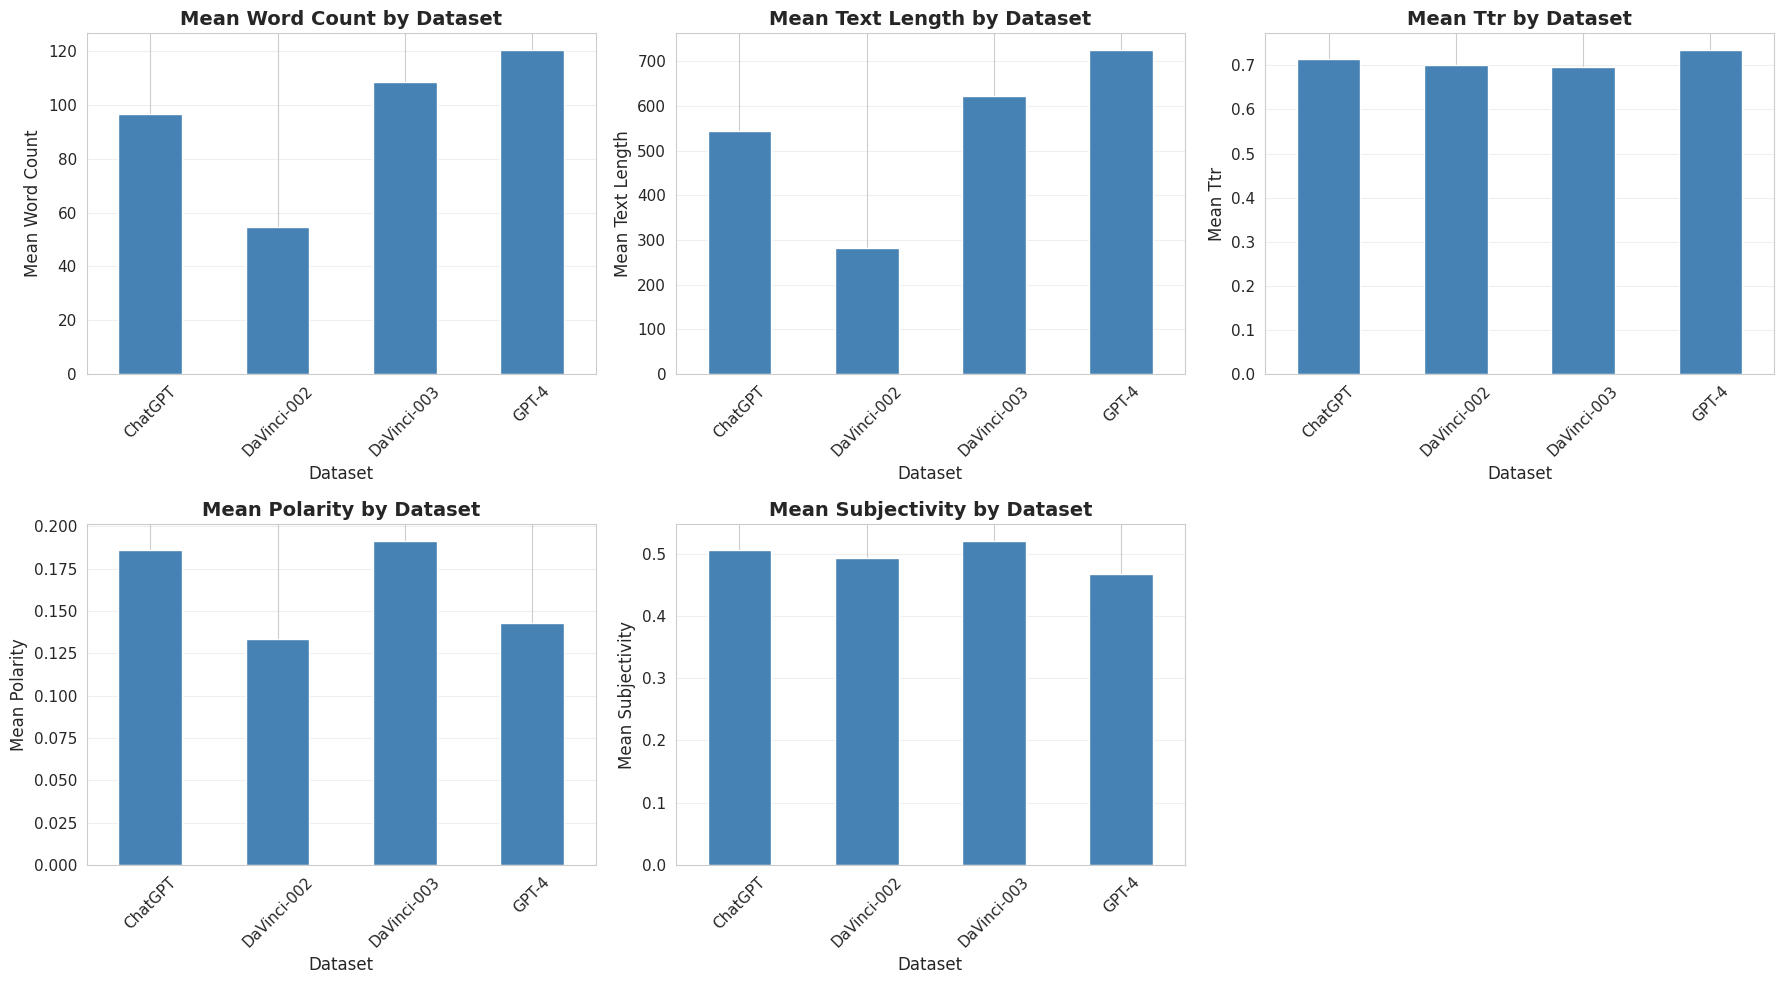

In [35]:
# Comparative visualization: Mean values across datasets
metrics = ['word_count', 'text_length', 'ttr', 'polarity', 'subjectivity']
dataset_means = df.groupby('dataset')[metrics].mean()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    dataset_means[metric].plot(kind='bar', ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'Mean {metric.replace("_", " ").title()} by Dataset', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Dataset', fontsize=12)
    axes[idx].set_ylabel(f'Mean {metric.replace("_", " ").title()}', fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=11)
    axes[idx].tick_params(axis='y', labelsize=11)
    axes[idx].grid(axis='y', alpha=0.3)

# Hide the extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('../docs/assets/eda_dataset_means.png', dpi=600, bbox_inches='tight')
plt.show()


In [36]:
# Statistical summary by dataset
summary_stats = df.groupby('dataset')[['word_count', 'text_length', 'ttr', 'avg_word_length', 'polarity', 'subjectivity']].agg(['mean', 'std', 'median'])
print("Statistical Summary by Dataset:")
print(summary_stats.round(3))

Statistical Summary by Dataset:
            word_count                text_length                    ttr  \
                  mean     std median        mean      std median   mean   
dataset                                                                    
ChatGPT         96.656  33.848  103.0     545.259  181.176  582.0  0.715   
DaVinci-002     54.631  23.917   55.0     282.869  118.165  292.0  0.702   
DaVinci-003    108.450  44.871  100.0     622.594  249.019  584.0  0.696   
GPT-4          120.660  44.000  121.0     726.653  256.966  714.0  0.736   

                          avg_word_length               polarity         \
               std median            mean    std median     mean    std   
dataset                                                                   
ChatGPT      0.060  0.708           4.700  0.338  4.698    0.186  0.108   
DaVinci-002  0.117  0.685           4.264  0.474  4.203    0.133  0.185   
DaVinci-003  0.062  0.694           4.773  0.370  4.746    0